In [50]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bs4
import requests
import lxml

import requests
import urllib
from bs4 import BeautifulSoup as bs

%matplotlib inline

Continuing from my previous assignment, I will further explore the 5 highest grossing movies and look at their ratings to see if they were also positively appreciated by the public. I will scrape 3 of the most used movie-ratings website: Rotten Tomatoes, Letterboxd and IMDB. I will only take into consideration the rating given by the public, and not by the critics.

In [2]:
url_wiki="https://en.wikipedia.org/wiki/List_of_highest-grossing_films"
gross_movie_list = pd.read_html(url_wiki)

In [3]:
gross_movie_list[0].head(5)

,Rank,Peak,Title,Worldwide gross,Year,Reference(s)
0,1,1,Avatar,"$2,847,246,203",2009,[# 1][# 2]
1,2,1,Avengers: Endgame,"$2,797,501,328",2019,[# 3][# 4]
2,3,1,Titanic,"$2,187,425,379",1997,[# 5][# 6]
3,4,3,Star Wars: The Force Awakens,"$2,068,223,624",2015,[# 7][# 8]
4,5,4,Avengers: Infinity War,"$2,048,359,754",2018,[# 9][# 10]


Rotten Tomatoes scraping

In [10]:
from rotten_tomatoes_scraper.rt_scraper import MovieScraper

Avatar = MovieScraper(movie_title="Avatar")
Avatar.extract_metadata()
AvengersEG = MovieScraper(movie_title="Avengers: Endgame")
AvengersEG.extract_metadata()
Titanic = MovieScraper(movie_title="Titanic")
Titanic.extract_metadata()
StarWarsFA = MovieScraper(movie_title="Star Wars: The Force Awakens")
StarWarsFA.extract_metadata()
AvengersIW = MovieScraper(movie_title="Avengers: Infinity War")
AvengersIW.extract_metadata()


print(Avatar.metadata)
print(AvengersEG.metadata)
print(Titanic.metadata)
print(StarWarsFA.metadata)
print(AvengersIW.metadata)

{'Score_Rotten': '82', 'Score_Audience': '82', 'Rating': 'PG-13', 'Genre': ['action', 'fantasy', 'sci-fi', 'adventure']}
{'Score_Rotten': '94', 'Score_Audience': '90', 'Rating': 'PG-13', 'Genre': ['action', 'fantasy', 'adventure', 'sci-fi']}
{'Score_Rotten': '89', 'Score_Audience': '69', 'Rating': 'PG-13', 'Genre': ['history', 'romance', 'drama']}
{'Score_Rotten': '93', 'Score_Audience': '86', 'Rating': 'PG-13', 'Genre': ['sci-fi', 'adventure', 'action', 'fantasy']}
{'Score_Rotten': '85', 'Score_Audience': '91', 'Rating': 'PG-13', 'Genre': ['adventure', 'fantasy', 'sci-fi', 'action']}


In [44]:
Rotten_Tomatoes = {"Avatar": 82, "Avengers EG": 90, "Titanic": 69, "Star Wars FA": 86, "Avengers IW": 91}
print(Rotten_Tomatoes)

{'Avatar': 82, 'Avengers EG': 90, 'Titanic': 69, 'Star Wars FA': 86, 'Avengers IW': 91}


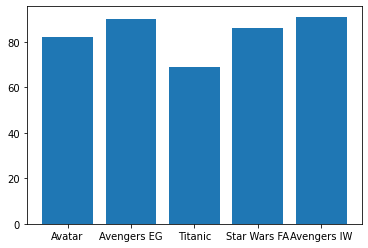

In [45]:
data = Rotten_Tomatoes
names = list(data.keys())
values = list(data.values())

plt.bar(range(len(data)), values, tick_label=names)

plt.show()

Letterboxd scraping

In [30]:
mov1 = requests.get('https://letterboxd.com/csi/film/avatar/rating-histogram/')
soup = bs(mov1.content, 'lxml')
ratings1 = [item['title'].replace('\xa0',' ') for item in soup.select('.tooltip')]
print(ratings1)

['Weighted average of 3.31 based on 348,717 ratings', '5,088 half-★ ratings (1%)', '11,841 ★ ratings (3%)', '8,165 ★½ ratings (2%)', '32,677 ★★ ratings (9%)', '29,159 ★★½ ratings (8%)', '78,854 ★★★ ratings (23%)', '54,459 ★★★½ ratings (16%)', '71,947 ★★★★ ratings (21%)', '19,539 ★★★★½ ratings (6%)', '36,988 ★★★★★ ratings (11%)']


In [32]:
mov2 = requests.get('https://letterboxd.com/csi/film/avengers-endgame/rating-histogram/')
soup = bs(mov2.content, 'lxml')
ratings2 = [item['title'].replace('\xa0',' ') for item in soup.select('.tooltip')]
print(ratings3)

['Weighted average of 3.91 based on 546,092 ratings', '3,359 half-★ ratings (1%)', '6,610 ★ ratings (1%)', '4,444 ★½ ratings (1%)', '19,275 ★★ ratings (4%)', '20,193 ★★½ ratings (4%)', '74,503 ★★★ ratings (14%)', '68,941 ★★★½ ratings (13%)', '144,470 ★★★★ ratings (26%)', '67,688 ★★★★½ ratings (12%)', '136,609 ★★★★★ ratings (25%)']


In [31]:
mov3 = requests.get('https://letterboxd.com/csi/film/titanic-1997/rating-histogram/')
soup = bs(mov3.content, 'lxml')
ratings3 = [item['title'].replace('\xa0',' ') for item in soup.select('.tooltip')]
print(ratings2)

['Weighted average of 3.75 based on 373,714 ratings', '1,889 half-★ ratings (1%)', '4,743 ★ ratings (1%)', '3,096 ★½ ratings (1%)', '16,835 ★★ ratings (5%)', '16,085 ★★½ ratings (4%)', '67,612 ★★★ ratings (18%)', '56,948 ★★★½ ratings (15%)', '101,355 ★★★★ ratings (27%)', '30,942 ★★★★½ ratings (8%)', '74,209 ★★★★★ ratings (20%)']


In [34]:
mov4 = requests.get('https://letterboxd.com/csi/film/star-wars-the-force-awakens/rating-histogram/')
soup = bs(mov4.content, 'lxml')
ratings4 = [item['title'].replace('\xa0',' ') for item in soup.select('.tooltip')]
print(ratings4)

['Weighted average of 3.55 based on 491,710 ratings', '2,710 half-★ ratings (1%)', '7,678 ★ ratings (2%)', '5,005 ★½ ratings (1%)', '27,590 ★★ ratings (6%)', '25,802 ★★½ ratings (5%)', '109,266 ★★★ ratings (22%)', '84,245 ★★★½ ratings (17%)', '142,166 ★★★★ ratings (29%)', '36,506 ★★★★½ ratings (7%)', '50,742 ★★★★★ ratings (10%)']


In [35]:
mov5 = requests.get('https://letterboxd.com/csi/film/avengers-infinity-war/rating-histogram/')
soup = bs(mov5.content, 'lxml')
ratings5 = [item['title'].replace('\xa0',' ') for item in soup.select('.tooltip')]
print(ratings5)

['Weighted average of 3.94 based on 581,010 ratings', '2,381 half-★ ratings (0%)', '5,941 ★ ratings (1%)', '3,415 ★½ ratings (1%)', '18,113 ★★ ratings (3%)', '17,159 ★★½ ratings (3%)', '76,779 ★★★ ratings (13%)', '71,434 ★★★½ ratings (12%)', '175,867 ★★★★ ratings (30%)', '74,835 ★★★★½ ratings (13%)', '135,086 ★★★★★ ratings (23%)']


In [46]:
Letterboxd = {"Avatar": 3.31, "Avengers EG": 3.91, "Titanic": 3.75, "Star Wars FA": 3.55, "Avengers IW": 3.94}
print(Letterboxd)

{'Avatar': 3.31, 'Avengers EG': 3.91, 'Titanic': 3.75, 'Star Wars FA': 3.55, 'Avengers IW': 3.94}


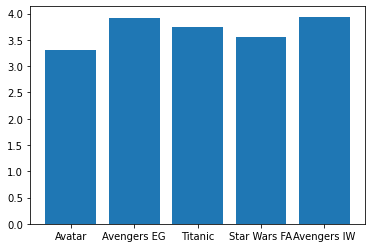

In [47]:
data = Letterboxd
names = list(data.keys())
values = list(data.values())

plt.bar(range(len(data)), values, tick_label=names)

plt.show()

IMDB scraping

In [66]:
from requests import get
url = 'https://www.imdb.com/title/tt0499549/'
response = get(url)
html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)
rating = html_soup.find("span",{"itemprop":"ratingValue"}).text
print(rating)

7.8


In [67]:
from requests import get
url = 'https://www.imdb.com/title/tt4154796/?ref_=nv_sr_srsg_0'
response = get(url)
html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)
rating = html_soup.find("span",{"itemprop":"ratingValue"}).text
print(rating)

8.4


In [68]:
from requests import get
url = 'https://www.imdb.com/title/tt0120338/?ref_=nv_sr_srsg_0'
response = get(url)
html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)
rating = html_soup.find("span",{"itemprop":"ratingValue"}).text
print(rating)

7.8


In [69]:
from requests import get
url = 'https://www.imdb.com/title/tt2488496/?ref_=nv_sr_srsg_0'
response = get(url)
html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)
rating = html_soup.find("span",{"itemprop":"ratingValue"}).text
print(rating)

7.8


In [70]:
from requests import get
url = 'https://www.imdb.com/title/tt4154756/?ref_=nv_sr_srsg_0'
response = get(url)
html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)
rating = html_soup.find("span",{"itemprop":"ratingValue"}).text
print(rating)

8.4


In [71]:
imdb = {"Avatar": 7.8, "Avenger EG": 8.4, "Titanic": 7.8, "Star Wars FA": 7.8, "Avengers IW": 8.4}
print(imdb)

{'Avatar': 7.8, 'Avenger EG': 8.4, 'Titanic': 7.8, 'Star Wars FA': 7.8, 'Avengers IW': 8.4}


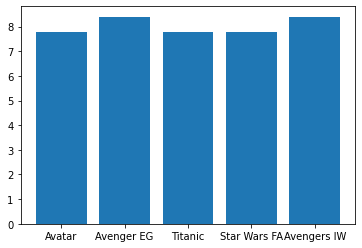

In [72]:
data = imdb
names = list(data.keys())
values = list(data.values())

plt.bar(range(len(data)), values, tick_label=names)

plt.show()

I will now put all of the rating in a list, in order to have a better understanding

In [76]:
Public_Ratings = [Rotten_Tomatoes, Letterboxd, imdb]
print(Public_Ratings)

[{'Avatar': 82, 'Avengers EG': 90, 'Titanic': 69, 'Star Wars FA': 86, 'Avengers IW': 91}, {'Avatar': 3.31, 'Avengers EG': 3.91, 'Titanic': 3.75, 'Star Wars FA': 3.55, 'Avengers IW': 3.94}, {'Avatar': 7.8, 'Avenger EG': 8.4, 'Titanic': 7.8, 'Star Wars FA': 7.8, 'Avengers IW': 8.4}]


It seems that Avatar, which is the highest grossing movie, was not so well received by the public as the others did. But overall it looks like there is a correspondance (and no discrepancy) between the box office revenue and the viewer appreciation.

-Manuel Meschiari